# Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tf.__version__

'2.3.0'

# Creating dataset

In [3]:
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
# X : x, y coordinates of points
# y : labels (0, 1)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

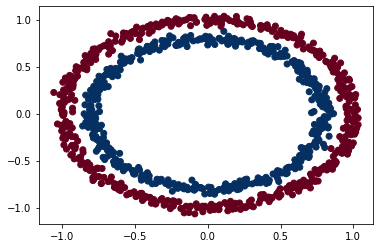

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.show()

# Input, output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [9]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

# Creating the model

In [10]:
tf.random.set_seed(42)

In [11]:
classifier = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(2),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

In [27]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [12]:
classifier.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

In [13]:
history = classifier.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [14]:
classifier.predict([[0, 0]])

array([[0.9999872]], dtype=float32)

In [15]:
classifier.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885359287262, 1.0]

In [28]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


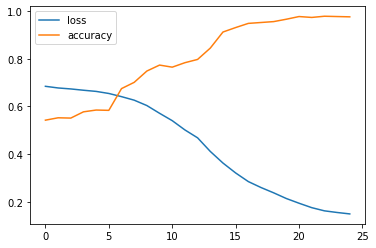

In [30]:
pd.DataFrame(history.history).plot()
plt.show()

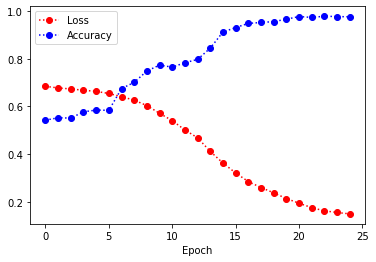

In [26]:
plt.plot(history.epoch, history.history['loss'], 'ro:', label='Loss')
plt.plot(history.epoch, history.history['accuracy'], 'bo:', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [32]:

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
    """
    
    steps = 100

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
                        np.linspace(y_min, y_max, steps))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification
doing binary classification


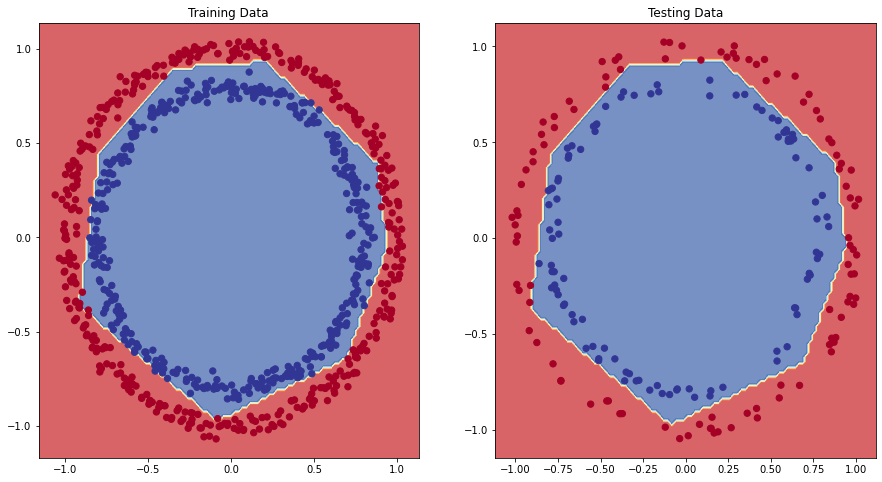

In [33]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.title('Training Data')
plot_decision_boundary(classifier, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Testing Data')
plot_decision_boundary(classifier, X_test, y_test)

plt.show()